In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [94]:
# Find the most recent date in the data set.
last_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
last_date = dt.datetime.strptime(last_date[0],'%Y-%m-%d')

last_date = dt.date(last_date.year,last_date.month,last_date.day)
print(last_date)

2017-08-23


In [165]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

data = engine.execute("select * from measurement")
# column headers info
# print(data.keys())

# Calculate the date one year from the last date in data set.
first_date = dt.date(last_date.year-1,last_date.month,last_date.day)
# print(first_date)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurements.date,measurements.prcp).filter(measurements.date >= first_date).order_by(measurements.date.asc()).all()
# for data in scores:
#     print(data)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(scores,columns=['date','prcp_amnt'])
prcp_df = prcp_df.set_index('date')
prcp_df.index = pd.to_datetime(prcp_df.index, format="%Y/%m/%d")
prcp_df = prcp_df.dropna(how='any')

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(['date'],ascending=True)
prcp_df.head(100)

# plot precipitation results using Dataframe plot method

prcp_plot = prcp_df.plot(figsize=(7,5), ylim=(0,7), title = f"Hawaii's Precipitation from {first_date} to {last_date}", rot=90)
prcp_plot.set_ylabel("Rain (inches)")
prcp_plot.set_xlabel("Date")
prcp_plot.grid()
plt.savefig("Images/precipitation_bar.png")
plt.show()

,prcp_amnt
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [103]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = prcp_df.describe()
summary =pd.DataFrame(summary.round(2))
summary

,prcp_amnt
count,2021.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [105]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(func.distinct(measurements.station))).first()[0]
total_stations

9

In [111]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# most_active = 
most_active_stns = session.query(measurements.station,func.count(measurements.id))\
    .group_by(measurements.station).order_by(func.count(measurements.id).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [163]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
top_station = session.query(measurements.station).group_by(measurements.station).\
    order_by(func.count(measurements.id).desc()).first()
top_station = top_station[0]
top_station
#grab min max and avg temp of most active station
top_station_data = session.query(measurements.station, func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs))\
    .filter(measurements.station==top_station).all()
top_station_data
# label and convert list of tuples into dataframe
top_station_data = pd.DataFrame(top_station_data, columns=['Station','Min Temp','Max Temp', 'Avg Temp'])
top_station_data

,Station,Min Temp,Max Temp,Avg Temp
0,USC00519281,54.0,85.0,71.663781


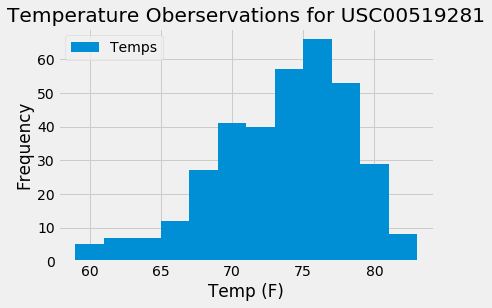

In [178]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_12_mnths = session.query(measurements.station,measurements.date,measurements.tobs)\
.filter(measurements.date >= first_date).filter(measurements.date <= last_date)\
.filter(measurements.station == top_station).order_by(measurements.date).all()

#prepare data for histogramp
top_step1 = pd.DataFrame(top_station_12_mnths,columns=['Station','Date','Temps'])
top_cleaned_hist = pd.DataFrame(top_step1[['Station','Temps']])
top_cleaned_hist
top_cleaned_hist.plot.hist(bins=12)
plt.title(f"Temperature Oberservations for {top_station}")
plt.xlabel('Temp (F)')
plt.ylabel('Frequency')
plt.savefig("Images/histogram_most_active_st_temps.png")
plt.show()

# Close session

In [179]:
# Close Session
session.close()